In [1]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
## mounting on gdrive/comment for jupyter
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação dos Dados

In [3]:
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/treino_309.csv')
df_test = pd.read_csv('drive/MyDrive/Colab Notebooks/BASE-PREPROCESSED(TESTE).gz', compression='gzip', sep='\t')

In [14]:
def create_split(df, target, drop_start):
    df = df.dropna()
    if 'PROPHET_NORM_FEATURES' in df:
        df.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    return df[df.columns[drop_start:]].to_numpy(), df[[target]].to_numpy().reshape(-1)

In [15]:
X_train, y_train = create_split(df_train, 'ALVO', drop_start=2)
X_test, y_test = create_split(df_test, 'ALVO', drop_start=1)

# Ensemble de Modelos por Max Voting

In [4]:
#model imports
import pickle

In [12]:
rf = pickle.load(open('drive/MyDrive/Colab Notebooks/RandomForest', 'rb'))
gbrt = pickle.load(open('drive/MyDrive/Colab Notebooks/GradientBoosting', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breakin

In [16]:
pred1=rf.predict(X_test)
pred2=gbrt.predict(X_test)

In [34]:
from scipy import stats
final_pred = []
for i in range(0,len(X_test)):
    final_pred.append(stats.mode([pred1[i], pred2[i]])[0][0])

In [35]:
accuracy = accuracy_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
roc = roc_auc_score(y_test, final_pred)

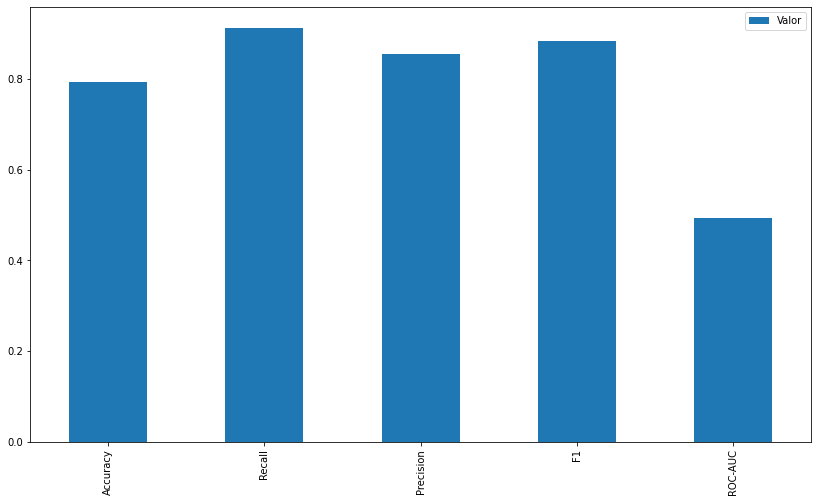

In [36]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))